In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

2022-11-29 12:09:47.191280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Import data 

In [2]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_american_clean.xlsx')

In [3]:
df_american = df_american.set_index(['date'])

In [4]:
X = df_american[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [5]:
y = df_american['pax_count'].values

## Train & test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Normalize the data

In [7]:
scaler = MinMaxScaler()

In [8]:
X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

## Creating the model 

In [10]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='relu'))

model.compile(loss = 'mean_squared_error', optimizer= 'adam')

2022-11-29 12:10:05.611444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Fit the model 

In [11]:
model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 1s 44ms/step - loss: 83325016342528.0000 - val_loss: 80648849063936.0000
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 83325024731136.0000 - val_loss: 80648849063936.0000
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 83325016342528.0000 - val_loss: 80648849063936.0000
Epoch 4/10
6/6 [==============================] - 0s 17ms/step - loss: 83325016342528.0000 - val_loss: 80648849063936.0000
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 83325024731136.0000 - val_loss: 80648849063936.0000
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 83325024731136.0000 - val_loss: 80648849063936.0000
Epoch 7/10
6/6 [==============================] - 0s 10ms/step - loss: 83325024731136.0000 - val_loss: 80648849063936.0000
Epoch 8/10
6/6 [==============================] - 0s 16ms/step - loss: 83325024731136.0000 - val_loss: 80648849063936.0000
Epoch 9/10
6/6 [

In [12]:
losses = pd.DataFrame(model.history.history)

In [13]:
losses

,loss,val_loss
0,8.332502e+13,8.064885e+13
1,8.332502e+13,8.064885e+13
2,8.332502e+13,8.064885e+13
3,8.332502e+13,8.064885e+13
4,8.332502e+13,8.064885e+13
5,8.332502e+13,8.064885e+13
6,8.332502e+13,8.064885e+13
7,8.332502e+13,8.064885e+13
8,8.332502e+13,8.064885e+13
9,8.332503e+13,8.064885e+13


<AxesSubplot:>

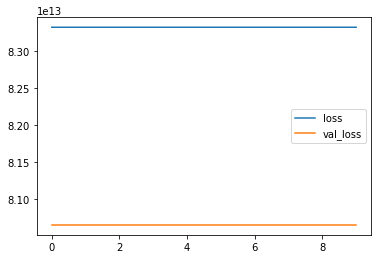

In [14]:
losses.plot()

In [15]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [17]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Layer:  dense
  --Kernels (Weights):  [array([[-0.2307341 ,  0.26094326,  0.3721084 , -0.5292907 ],
       [-0.50695187,  0.56115764,  0.57014966, -0.4588708 ],
       [ 0.27013168,  0.6668317 , -0.13071449, -0.15046525],
       [ 0.57093066, -0.15500787,  0.12343893, -0.01388431]],
      dtype=float32), array([ 0.06916185

In [18]:
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 8980469.76 RMSE


In [20]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 8980469.76 RMSE


In [21]:
def plot_american(actual, predictions):
    title = 'Sales Predictions Store '
    act = plt.plot(actual, color='turquoise', label='Actual')
    pred = plt.plot(predictions, color='darkgoldenrod', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

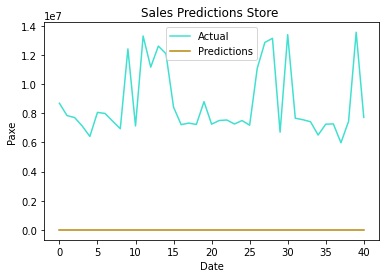

In [22]:
plot_american(y_test, testPredict)